

### Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
    
### Class Distribution:
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances
    

#### https://archive.ics.uci.edu/ml/datasets/Mushroom

In [117]:
# Imports and describes data
import pandas as pd

data_folder = './data'
names = 'edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat'.split(',')

df = pd.read_csv(f'{data_folder}/agaricus.csv', encoding='utf-8', names=names, dtype=str)
df.describe()

,edible,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


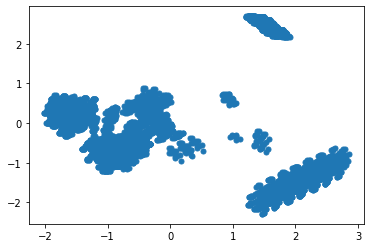

In [123]:
# Dummify data and perform PCA
from sklearn import decomposition
import matplotlib.pyplot as plt

df_d = pd.get_dummies(df)

pca = decomposition.PCA(n_components=2)
pca.fit(df_d)
df_pca = pca.transform(df_d)

# Visualize data
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=25);

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculate cluster performance
def cluster_performance(n):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_d)
    y_kmeans = kmeans.predict(df_d)
    value = silhouette_score(df_pca, y_kmeans)
    return value

In [132]:
# Find best k value

def find_best_k():
    value = 0
    values = []
    best_value = 0
    best_iteration = 0
    for i in range(2, 15):

        value = cluster_performance(i)
        values.append(value)

        if value > best_value:
            best_value = value
            best_iteration = i

        print(f'Cluster #{i} has a value of {value}')

    print(f'k = {best_iteration} has the best value, with {best_value}')
    
    return (values, best_iteration)

values, k = find_best_k()

Cluster #2 has a value of 0.610315604284308
Cluster #3 has a value of 0.7778789912320612
Cluster #4 has a value of 0.5211277248900094
Cluster #5 has a value of 0.43648933059175804
Cluster #6 has a value of 0.41770489948884515
Cluster #7 has a value of 0.3703980112842191
Cluster #8 has a value of 0.36517218704762777
Cluster #9 has a value of 0.3002455927015549
Cluster #10 has a value of 0.17000753212423445
Cluster #11 has a value of 0.16550976005550116
Cluster #12 has a value of 0.17081627111142866
Cluster #13 has a value of 0.012688259793110985
Cluster #14 has a value of 0.19317368800573362
k = 3 has the best value, with 0.7778789912320612


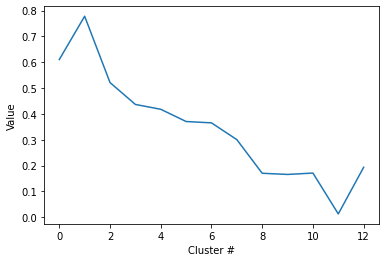

In [136]:
plt.plot(values)
plt.xlabel('Cluster #')
plt.ylabel('Value')
plt.show()

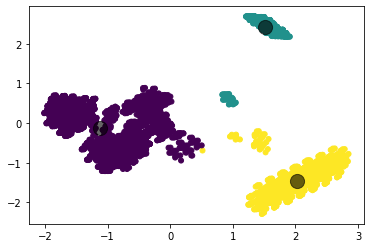

In [131]:
# Visualize clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_pca)
y_kmeans = kmeans.predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6);